In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
def plot_model(curr_loss, curr_test_loss, prediction, i):
    plt.plot(xx, yy, 'o')
    plt.plot(xx, yy_test, 'o')
    plt.plot(xxx, prediction, '-r')
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('{0}'.format(i))
    plt.show()

In [3]:
np.random.seed(417)
xxx = np.linspace(-1,1,500)# for drawing
xx = np.linspace(-1,1,50)
yy = xx**2 + 0.5 * xx + 1.0 + 0.5 * (2 * np.random.rand(len(xx)) - 1)
yy_test = xx**2 + 0.5 * xx + 1.0 + 0.5 * (2 * np.random.rand(len(xx)) - 1)

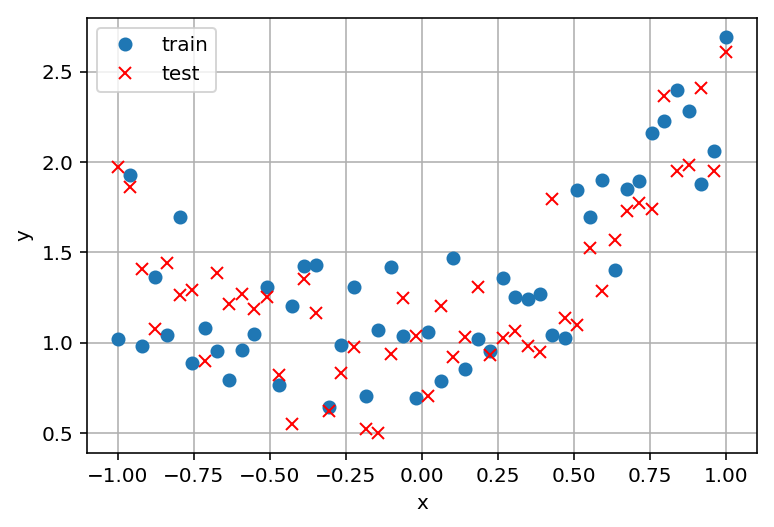

In [4]:
plt.plot(xx, yy, 'o', label='train')
plt.plot(xx, yy_test, 'xr', label='test')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [5]:
features = np.array([[xval] for xval in xx])
print(features.shape)
labels = yy

(50, 1)


## Overfitted Regression Model

In [6]:
num_hidden1 = 10
num_hidden2 = 4
x = tf.placeholder(tf.float32, shape=[None, 1])

tf.set_random_seed(180417)

W1 = tf.Variable(tf.random_normal([1, num_hidden1]))
b1 = tf.Variable(tf.random_normal([num_hidden1]))

W2 = tf.Variable(tf.random_normal([num_hidden1, num_hidden2]))
b2 = tf.Variable(tf.random_normal([num_hidden2]))

W3 = tf.Variable(tf.random_normal([num_hidden2, 1]))
b3 = tf.Variable(tf.random_normal([1]))

hidden1 = tf.nn.sigmoid(tf.matmul(x, W1) + b1)
hidden2 = tf.nn.sigmoid(tf.matmul(hidden1, W2) + b2)

# Final model
model = tf.matmul(hidden2, W3) + b3

y = tf.placeholder(tf.float32, shape=[None, 1])
loss = tf.reduce_mean(tf.squared_difference(y, model))

optimizer = tf.train.AdamOptimizer()
train = optimizer.minimize(loss)

0 0.273752 0.323573


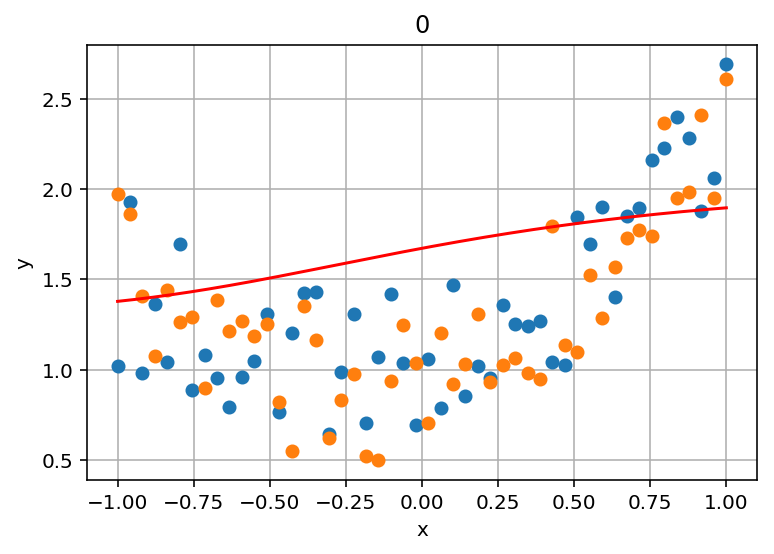

1000 0.0934558 0.107161
2000 0.0735555 0.0780773
3000 0.0720085 0.078674
4000 0.0713306 0.0784396
5000 0.0705991 0.0784603
6000 0.0701204 0.0787283
7000 0.0693421 0.0792248
8000 0.0682065 0.0787385
9000 0.0654713 0.0811763
10000 0.0618244 0.0826495


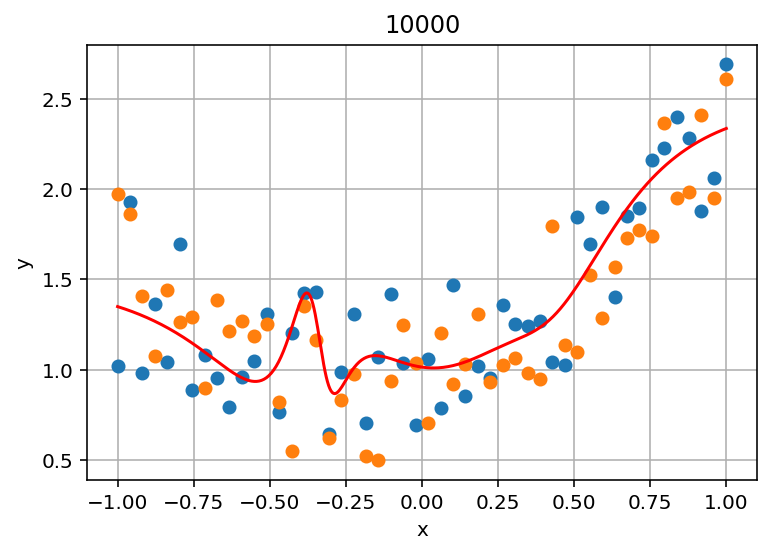

11000 0.0595519 0.08418
12000 0.0583064 0.0832606
13000 0.0575439 0.0835798
14000 0.0570561 0.0841425
15000 0.0565723 0.0848388
16000 0.056091 0.0854338
17000 0.0556821 0.0859848
18000 0.0552669 0.0865017
19000 0.0547759 0.0873647
20000 0.0542038 0.0883323


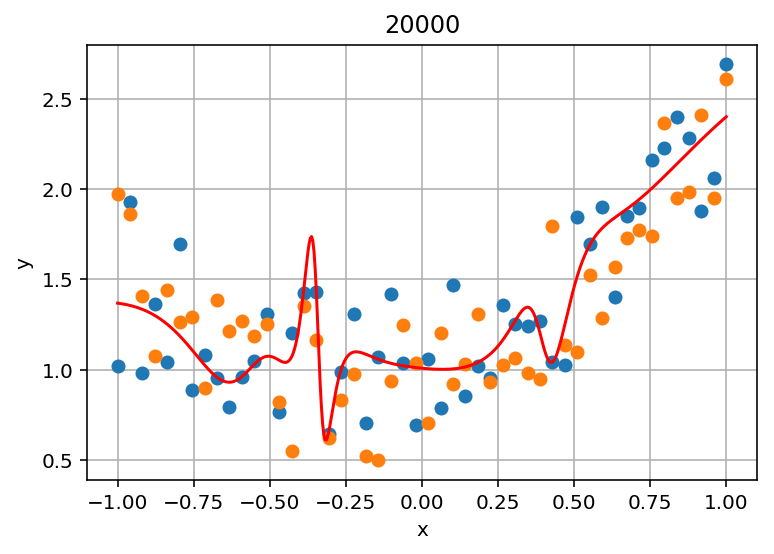

In [7]:
losses = []
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(20001):
    sess.run(train, feed_dict={x:features, y:labels.reshape(-1,1)})
    curr_loss = sess.run(loss, feed_dict={x:features, y:labels.reshape(-1,1)})
    curr_test_loss = sess.run(loss, feed_dict={x:features, y:yy_test.reshape(-1,1)})
    losses.append([curr_loss, curr_test_loss])
    if i % 1000 == 0:
        print(i, curr_loss, curr_test_loss)
    if i % 10000 == 0:
        prediction = sess.run(model, feed_dict={x:xxx.reshape(-1,1), y:labels.reshape(-1,1)})
        plot_model(curr_loss, curr_test_loss, prediction, i)

losses = np.array(losses)

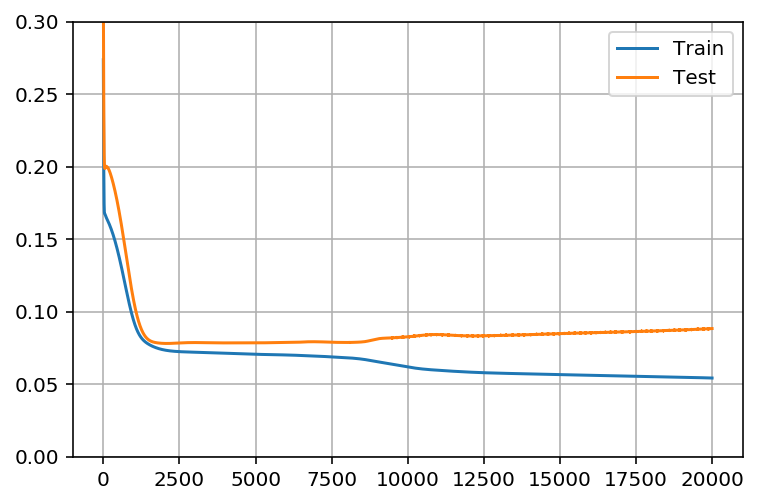

In [8]:
plt.plot(losses[:, 0], label='Train')
plt.plot(losses[:, 1], label='Test')
plt.grid()
plt.ylim([0, .3])
plt.legend()
plt.show()

## L2 Regularized Regression

`l2_loss`는 아래 식을 계산해야합니다.
$$
\frac{\beta}{2}\sum_{ij} |W^1_{ij}|^2 + \frac{\beta}{2}\sum_{ij} |W^2_{ij}|^2 + \frac{\beta}{2}\sum_{ij} |W^3_{ij}|^2
$$

다음 함수를 참고하세요
- `tf.reduce_sum()`
- `tf.square()`

In [9]:
beta = 1E-3
# TODO 1
l2_loss = beta / 2 * ( tf.reduce_sum(tf.square(W1)) \
                      + tf.reduce_sum(tf.square(W2)) \
                      + tf.reduce_sum(tf.square(W3)) )

optimizer = tf.train.AdamOptimizer()
train = optimizer.minimize(loss + l2_loss)

0 0.273752 0.0297293 0.323573 0.0297293


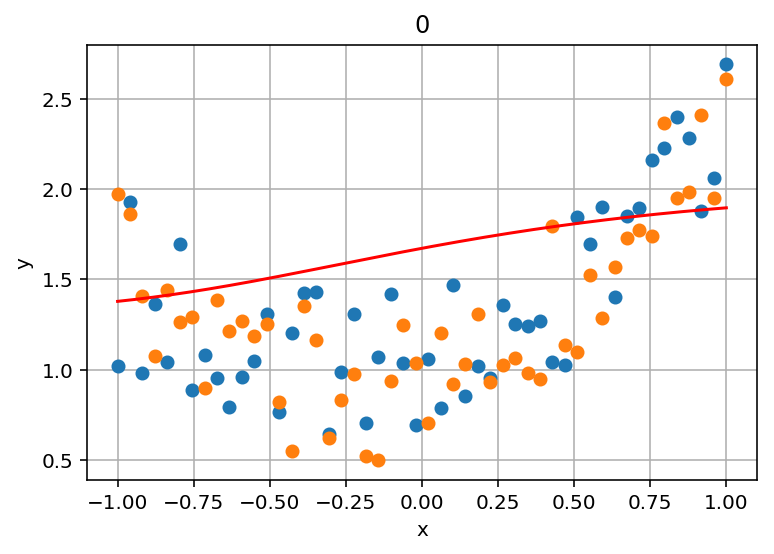

1000 0.10066 0.0286754 0.118853 0.0286754
2000 0.0764079 0.0275039 0.0805115 0.0275039
3000 0.0739472 0.0234516 0.0787742 0.0234516
4000 0.0733096 0.0209836 0.0786524 0.0209836
5000 0.0729581 0.0194849 0.0788697 0.0194849
6000 0.0726317 0.0187005 0.0795993 0.0187005
7000 0.0725024 0.0182625 0.0799856 0.0182625
8000 0.0724947 0.0181664 0.0800462 0.0181664
9000 0.0725003 0.0181235 0.0800192 0.0181235
10000 0.0725072 0.018103 0.0799983 0.018103


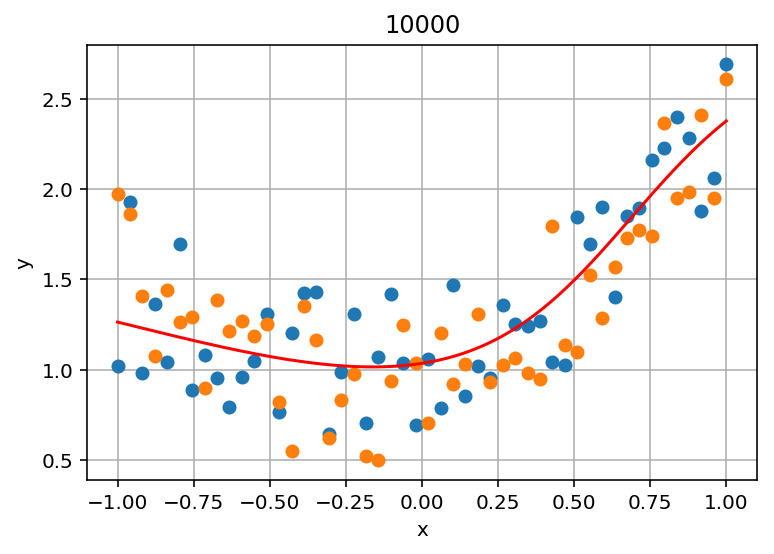

11000 0.0725145 0.018091 0.0799858 0.018091
12000 0.0725215 0.0180812 0.0799786 0.0180812
13000 0.072528 0.0180725 0.0799713 0.0180725
14000 0.0725338 0.0180647 0.0799668 0.0180647
15000 0.0725389 0.0180578 0.0799653 0.0180578
16000 0.0725441 0.0180514 0.0799154 0.0180514
17000 0.0725476 0.0180462 0.0799553 0.0180462
18000 0.0725512 0.0180414 0.0799572 0.0180414
19000 0.0725545 0.0180371 0.0799502 0.0180371
20000 0.0725574 0.0180332 0.0799472 0.0180332


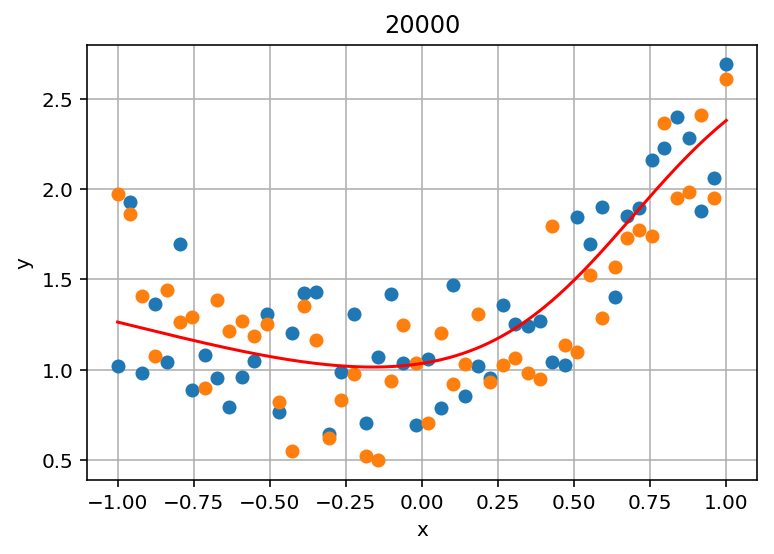

In [10]:
losses = []
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(20001):
    sess.run(train, feed_dict={x:features, y:labels.reshape(-1,1)})
    curr_loss, curr_l2_loss = sess.run([loss, l2_loss], feed_dict={x:features, y:labels.reshape(-1,1)})
    curr_test_loss, curr_test_l2_loss = sess.run([loss, l2_loss], feed_dict={x:features, y:yy_test.reshape(-1,1)})
    losses.append([curr_loss, curr_l2_loss, curr_test_loss, curr_test_l2_loss])
    if i % 1000 == 0:
        print(i, curr_loss, curr_l2_loss, curr_test_loss, curr_test_l2_loss)
    if i % 10000 == 0:
        prediction = sess.run(model, feed_dict={x:xxx.reshape(-1,1), y:labels.reshape(-1,1)})
        plot_model(curr_loss, curr_test_loss, prediction, i)

losses = np.array(losses)

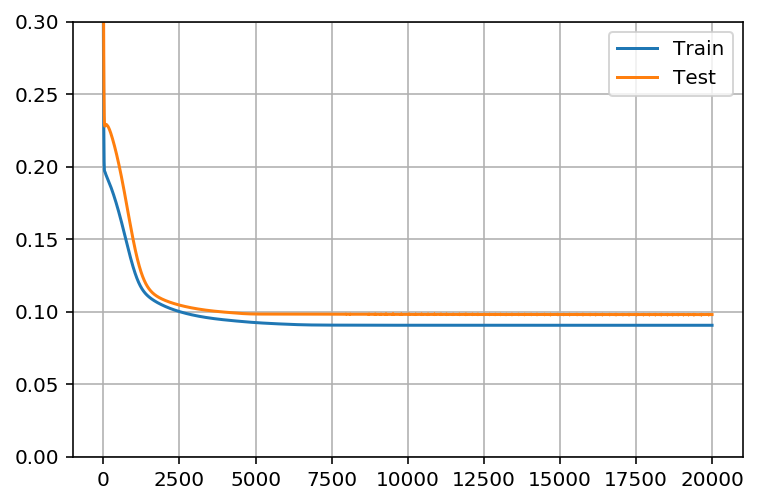

In [11]:
plt.plot(losses[:, 0] + losses[:, 1], label='Train')
plt.plot(losses[:, 2] + losses[:, 3], label='Test')
plt.grid()
plt.ylim([0, .3])
plt.legend()
plt.show()

## L1 Regularized Regression

`l1_loss`는 아래 식을 계산해야합니다.
$$
\frac{\beta}{2}\sum_{ij} |W^1_{ij}| + \frac{\beta}{2}\sum_{ij} |W^2_{ij}| + \frac{\beta}{2}\sum_{ij} |W^3_{ij}|
$$

다음 함수를 참고하세요.
- `tf.reduce_sum()`
- `tf.abs()`

In [16]:
beta = 1E-3
# TODO 2
l1_loss = beta / 2 * ( tf.reduce_sum(tf.abs(W1)) \
                      + tf.reduce_sum(tf.abs(W2)) \
                      + tf.reduce_sum(tf.abs(W3)) )

optimizer = tf.train.AdamOptimizer()
train = optimizer.minimize(loss + l1_loss)

0 0.273752 0.0229208 0.323573 0.0229208


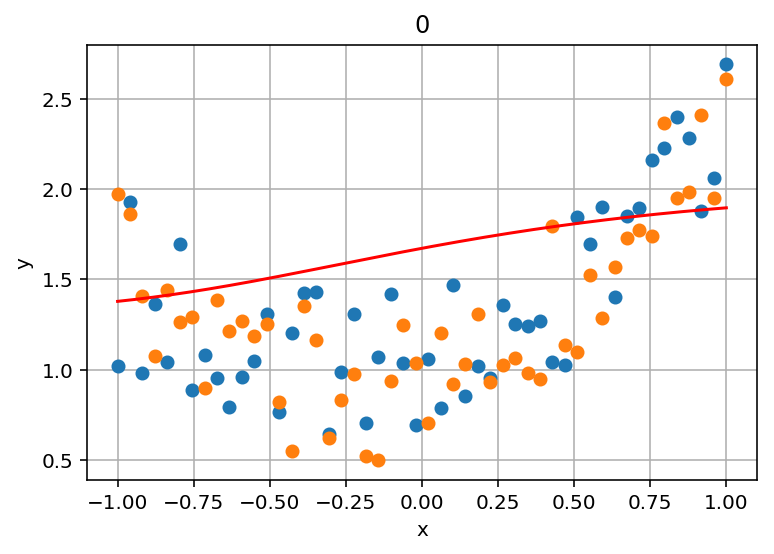

1000 0.0962628 0.022146 0.11157 0.022146
2000 0.0749611 0.0212536 0.0777521 0.0212536
3000 0.0730473 0.0191519 0.0765175 0.0191519
4000 0.0725146 0.0156219 0.0765808 0.0156219
5000 0.072043 0.0123982 0.0773545 0.0123982
6000 0.0716146 0.00997249 0.0783425 0.00997249
7000 0.0713319 0.00838873 0.0793708 0.00838873
8000 0.0712467 0.00722565 0.0793222 0.00722565
9000 0.0712259 0.00669692 0.0795031 0.00669692
10000 0.0712079 0.00670481 0.0795445 0.00670481


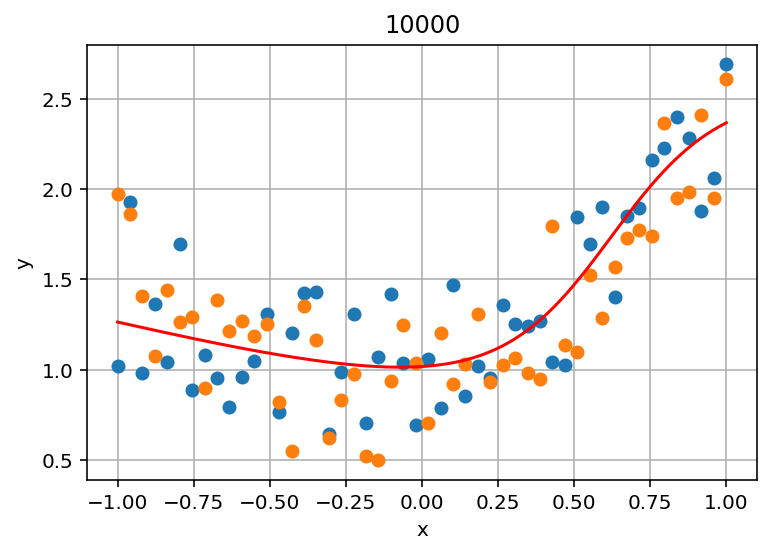

11000 0.0712015 0.00670845 0.0795404 0.00670845
12000 0.0711998 0.00670992 0.07953 0.00670992
13000 0.0711988 0.00671068 0.0795683 0.00671068
14000 0.0711981 0.00671141 0.0795538 0.00671141
15000 0.0711979 0.00671154 0.0795615 0.00671154
16000 0.0711976 0.00671172 0.0795239 0.00671172
17000 0.0711972 0.00671181 0.0795371 0.00671181
18000 0.0711973 0.00671227 0.0795507 0.00671227
19000 0.0711972 0.00671221 0.07955 0.00671221
20000 0.0711973 0.00671201 0.0795215 0.00671201


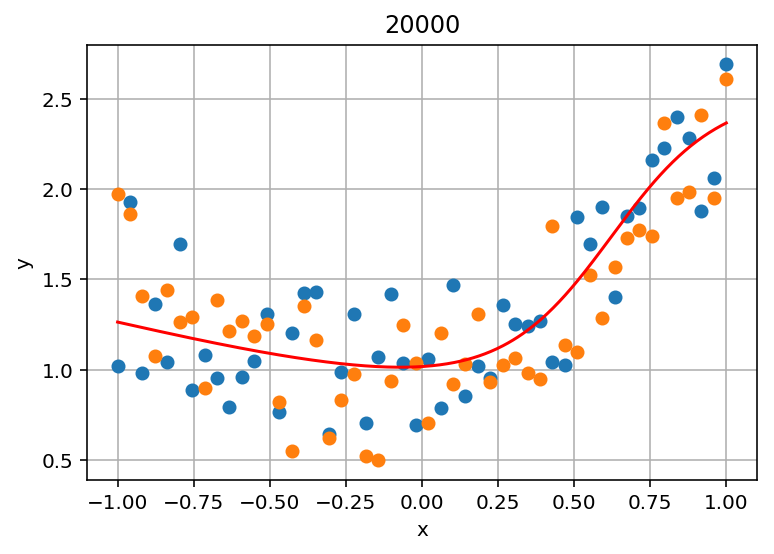

In [13]:
losses = []
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(20001):
    sess.run(train, feed_dict={x:features, y:labels.reshape(-1,1)})
    curr_loss, curr_l1_loss = sess.run([loss, l1_loss], feed_dict={x:features, y:labels.reshape(-1,1)})
    curr_test_loss, curr_test_l1_loss = sess.run([loss, l1_loss], feed_dict={x:features, y:yy_test.reshape(-1,1)})
    losses.append([curr_loss, curr_l1_loss, curr_test_loss, curr_test_l1_loss])
    if i % 1000 == 0:
        print(i, curr_loss, curr_l1_loss, curr_test_loss, curr_test_l1_loss)
    if i % 10000 == 0:
        prediction = sess.run(model, feed_dict={x:xxx.reshape(-1,1), y:labels.reshape(-1,1)})
        plot_model(curr_loss, curr_test_loss, prediction, i)

losses = np.array(losses)

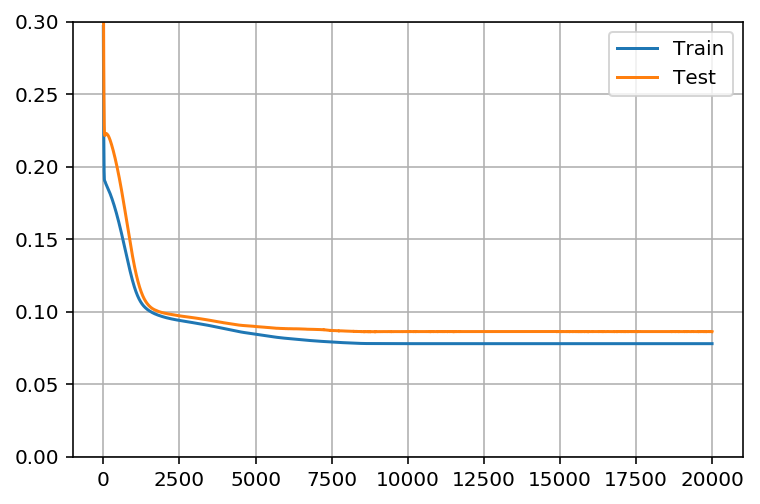

In [14]:
plt.plot(losses[:, 0] + losses[:, 1], label='Train')
plt.plot(losses[:, 2] + losses[:, 3], label='Test')
plt.grid()
plt.ylim([0, .3])
plt.legend()
plt.show()

0 0.27789 29696.4 0.327895 29696.4


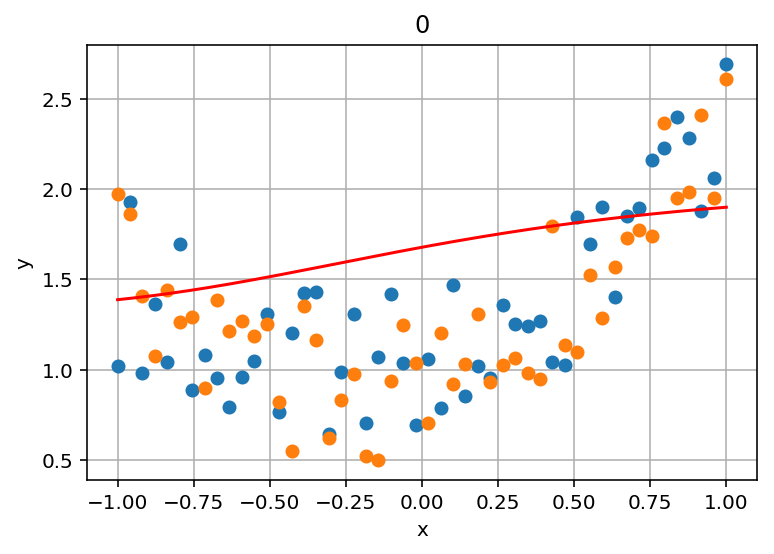

1000 0.241138 6675.16 0.228159 6675.16
2000 0.243646 1432.01 0.232325 1432.01
3000 0.243332 213.936 0.232913 213.936
4000 0.243293 14.6308 0.233269 14.6308
5000 0.243289 0.248303 0.233432 0.248303
6000 0.243288 0.000351383 0.233463 0.000351383
7000 0.243288 6.24125e-09 0.233465 6.24125e-09
8000 0.243288 1.17808e-16 0.233465 1.17808e-16
9000 0.243288 1.96404e-17 0.233465 1.96404e-17
10000 0.243288 2.38078e-09 0.233465 2.38078e-09


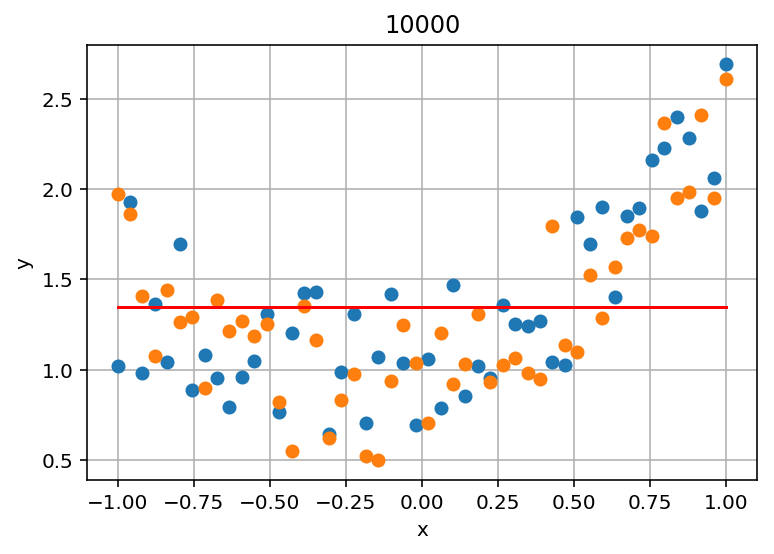

11000 0.243288 1.03598e-17 0.233465 1.03598e-17
12000 0.243288 1.16493e-17 0.233465 1.16493e-17
13000 0.243288 3.05774e-13 0.233465 3.05774e-13
14000 0.243288 4.51839e-15 0.233465 4.51839e-15
15000 0.243288 6.13689e-07 0.233465 6.13689e-07
16000 0.243288 2.11936e-14 0.233465 2.11936e-14
17000 0.243288 1.04232e-05 0.233465 1.04232e-05
18000 0.243288 8.61829e-10 0.233465 8.61829e-10
19000 0.243288 1.63562e-07 0.233461 1.63562e-07
20000 0.243288 1.50593e-06 0.233466 1.50593e-06


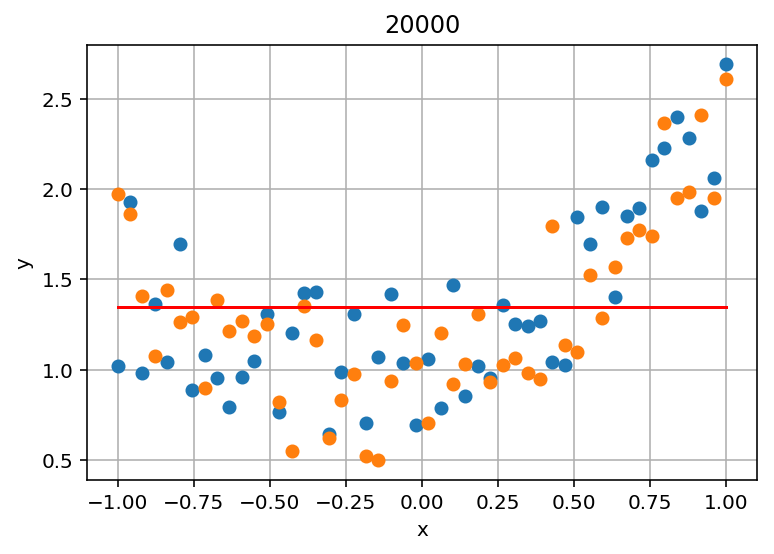

In [15]:
beta = 1E3
# TODO 1
l2_loss = beta / 2 * ( tf.reduce_sum(tf.square(W1)) + tf.reduce_sum(tf.square(W2)) + tf.reduce_sum(tf.square(W3)) )

optimizer = tf.train.AdamOptimizer()
train = optimizer.minimize(loss + l2_loss)

losses = []
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(20001):
    sess.run(train, feed_dict={x:features, y:labels.reshape(-1,1)})
    curr_loss, curr_l2_loss = sess.run([loss, l2_loss], feed_dict={x:features, y:labels.reshape(-1,1)})
    curr_test_loss, curr_test_l2_loss = sess.run([loss, l2_loss], feed_dict={x:features, y:yy_test.reshape(-1,1)})
    losses.append([curr_loss, curr_l2_loss, curr_test_loss, curr_test_l2_loss])
    if i % 1000 == 0:
        print(i, curr_loss, curr_l2_loss, curr_test_loss, curr_test_l2_loss)
    if i % 10000 == 0:
        prediction = sess.run(model, feed_dict={x:xxx.reshape(-1,1), y:labels.reshape(-1,1)})
        plot_model(curr_loss, curr_test_loss, prediction, i)

losses = np.array(losses)